In [1]:
from city_tasks_assignment.classes import Problem
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm # To fit normal distribution

In [2]:
SAVE_PLOTS = False
DPI = 400

## Comparaison between sa_optimize and ilp_optimize

In [3]:
# Create random problem. Results may vary with different problems.

problem = Problem()
problem.create_random(11, 2, 2, 2)

In [4]:
its = 10 # How many times to optimize

In [5]:
# Comparaison

ilp_times = np.empty((its, ))
ilp_fss = np.empty((its,))

sa_times = np.empty((its,))
sa_fss = np.empty((its,))

for i in range(its):
    st = time()
    ilp_fss[i], ls = problem.ilp_optimize()
    ilp_times[i] = time() - st
    
    st = time()
    sa_fss[i], _, fss = problem.sa_optimize(ini_tasks_to_rearrange=5)
    sa_times[i] = time() - st

In [6]:
ls = list(zip([ilp_fss[0], 0],
              [np.mean(ilp_times), np.std(ilp_times)],
              [np.mean(sa_fss), np.std(sa_fss)],
              [np.mean(sa_times), np.std(sa_times)]))

df = pd.DataFrame(ls, index=['mean', 'std'], columns=['ilp_fitness', 'ilp_times', 'sa_fitness', 'sa_times'])
df

,ilp_fitness,ilp_times,sa_fitness,sa_times
mean,11.940551,18.908027,12.189108,0.232017
std,0.000000,2.509626,0.721901,0.014834


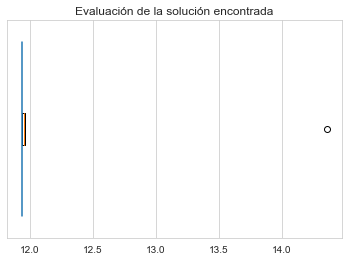

In [7]:
plt.boxplot(sa_fss, vert=False)
_, _, ym, yM = plt.axis()
plt.plot([ilp_fss[0], ilp_fss[0]], [ym + .1, yM -.1])
plt.yticks([])
plt.title('Evaluación de la solución encontrada')

if SAVE_PLOTS:
    plt.savefig("boxplot.png", dpi=DPI)
else:
    plt.show()

## Comparaison between different rearangement methods

In [8]:
# Create random problem with 99 tasks

p1 = Problem()
p1.create_random(100, 5, n_days=5)

In [9]:
inter = p1.sa_optimize(rearrange_opt=0)[-1]
op = p1.sa_optimize(rearrange_opt=1)[-1]
perm = p1.sa_optimize(rearrange_opt=2)[-1]
pegar = p1.sa_optimize(rearrange_opt=3)[-1]
remute = p1.sa_optimize(rearrange_opt=4)[-1]

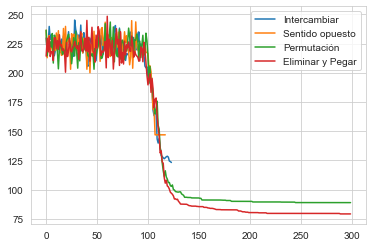

In [10]:
plt.plot(inter, label='Intercambiar')
plt.plot(op + [op[-1]] * 10, label='Sentido opuesto')
plt.plot(perm, label='Permutación')
plt.plot(pegar, label='Eliminar y Pegar')
plt.legend()

if SAVE_PLOTS:
    plt.savefig("comp_reorg.png", dpi=DPI)
else:
    plt.show()

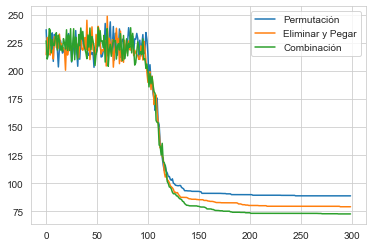

In [11]:
plt.plot(perm, label='Permutación')
plt.plot(pegar, label='Eliminar y Pegar')
plt.plot(remute, label='Combinación')
plt.legend()

if SAVE_PLOTS:
    plt.savefig("comp_reorg_selection.png", dpi=DPI)
else:
    plt.show()

## Montecarlo simulations for the multiobjective problem.

In [12]:
problem = Problem()
problem.create_random(11, 2, 2, 2)

### Stochastic times and costs

In [13]:
# Non deterministic times and costs
fs = problem.monte_carlo_simulation("MO_fitness.txt", [.3]*11*11, [.3]*2*11, [0.001]*5*10, [.001]*10, 1, 0, 40, 40, its=100, print_conf=False)

In [14]:
# Fit a normal distribution to the data:
mu, std = norm.fit(fs)

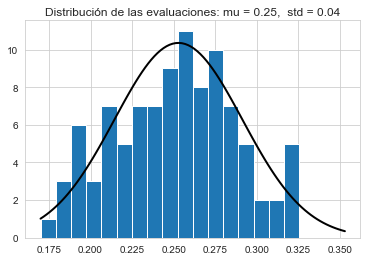

In [15]:
# Plot the normal distribution:
xmin, xmax = min(fs), max(fs)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
title = "Distribución de las evaluaciones: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.plot(x, p, 'k', linewidth=2)

# Plot the histogram:
problem.plot_fs_MC(fs, savefig=SAVE_PLOTS, dpi=DPI)

### Multiobjective parameters

In [16]:
# Multi-objective parameters
ls = problem.monte_carlo_simulation_MO("sols.txt", 40, 40, its=100, print_conf=False)

    To plot the pareto frontier:

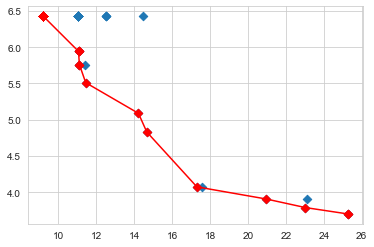

In [17]:
problem.plot_MO_pareto(ls, savefig=SAVE_PLOTS, dpi=DPI)

    To find out how diferent weights affect the objectives:

In [18]:
# Multi-objective parameters
ls = problem.monte_carlo_simulation_MO("sols.txt", 40, 40, its=100, print_conf=False)

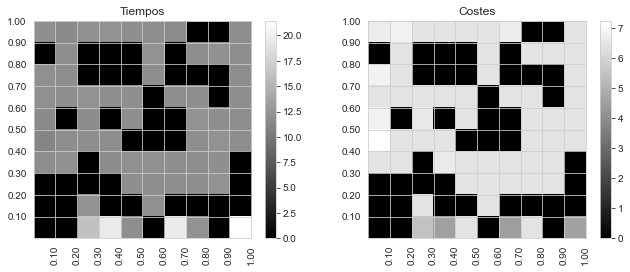

In [19]:
problem.plot_MO(ls, 10, savefig=SAVE_PLOTS, dpi=DPI)